<a href="https://colab.research.google.com/github/017mori/FarmAI/blob/master/Analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indice
1) Extração dos dados

2) Dicionário de dados

3) Transformação

4) Analise das informcações

5) Modelagem Matemática

6) Resultados

# Dicionário de dados



1.   PRODUTIVIDADE_FINAL   = % da produtividade resultada da produção;
2.   PERDA_FINAL           = % da perda da produção;
3.   CHUVA_DO_PERIODO      = Quantidade de chuvas em mm no periodo;
4.   TEMPERATURA_MEDIA     = Temperatura média do período em ºC;
5.   MAIOR_TEMPERATURA_MAX = Temperatura máxima do período em ºC;
6.   MENOR_TEMPERATURA_MIN = Temperatura miníma do período em ºC;
7.   Estadual              = Preço médio da saca de 50kg de arroz arrigado em RS; 	
8.   Nacional              = Preço médio da saca de 50kg de arroz arrigado no Brasil.

 


# Análise sobre o preço médio de arroz do RS vs Produtividade do arroz em Alegrete-RS.
* Para saber mais sobre regreção [click aqui](https://realpython.com/linear-regression-in-python/).
---


In [ ]:
#Para trabalharmos com os bancos de dados
import pandas as pd
import numpy as np

#Para as regreções
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#Para os gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#1) Extração dos dados
##Importando os bancos de dados:
###Sobre o banco de dados
*   Contém variáveis de Produtividade de Arroz Arrigado em Alegrete (cidade de RS); variáveis climáticas; e os valores médio de arroz arrigado por saca de 50kg no RS;  
*   Uma informação util é que o arroz levou 3 meses para ser colhido, logo, todo o banco de dados é um acompanhamento das variáveis durante o período de Novembro de 2019 á Julho de 2020;
*Você pode encontrar os dados no site do [INMET](https://http://sisdagro.inmet.gov.br/sisdagro/app/monitoramento/bhc) e do [AGROLINK](https://www.agrolink.com.br/cotacoes/historico/rs/arroz-irrigado-em-casca-sc-50kg).

---



In [ ]:
url = "https://raw.githubusercontent.com/017mori/FarmAI/master/Alegrete-RS.csv"
alegrete_df = pd.read_csv(url, sep =";", decimal=",")
alegrete_df.head()

,DATA,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
0,01/01/2018,70.00,29.75,81,483.0,21.10,37.7,7.2,36.63,36.75
1,02/01/2018,45.03,54.97,78,516.0,22.44,37.7,7.2,35.92,35.14
2,03/01/2018,28.04,71.96,85,459.6,23.61,37.7,7.3,34.90,34.25
3,04/01/2018,53.28,46.72,79,564.0,23.94,37.7,10.5,35.32,34.71
4,05/01/2018,55.17,44.83,78,505.2,23.42,35.4,10.5,35.87,35.17


#Análise das variáveis do banco de dados:
---

In [ ]:
alegrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA                     31 non-null     object 
 1   PRODUTIVIDADE_FINAL      31 non-null     float64
 2   PERDA_FINAL              31 non-null     float64
 3   TOTAL_DE_DIAS_SEM_CHUVA  31 non-null     int64  
 4   CHUVA_DO_PERIODO         31 non-null     float64
 5   TEMPERATURA_MEDIA        31 non-null     float64
 6   MAIOR_TEMPERATURA_MAX    31 non-null     float64
 7   MENOR_TEMPERATURA_MIN    31 non-null     float64
 8   Estadual                 31 non-null     float64
 9   Nacional                 31 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.5+ KB


#Análise descritiva dos dados:
* Rodamos um comando para demonstrar as medidas mais importantes de todas as variáveis.
---

In [ ]:
alegrete_df.describe()

,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
count,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,61.69871,38.324839,79.096774,536.743548,20.230323,36.319355,3.787097,43.898065,43.249677
std,20.84381,20.813681,6.415371,196.178171,3.372528,2.875693,4.771355,6.851721,6.403960
min,23.63000,5.370000,70.000000,221.000000,13.540000,29.300000,-3.200000,34.900000,34.250000
25%,48.17500,20.120000,75.000000,447.100000,17.935000,34.900000,-0.550000,40.075000,39.825000
50%,62.15000,37.850000,78.000000,505.200000,21.130000,37.100000,3.300000,43.160000,42.470000
75%,79.88000,51.825000,80.500000,580.000000,23.280000,37.700000,8.600000,45.725000,45.280000
max,94.63000,76.370000,95.000000,1037.600000,24.680000,40.000000,10.500000,62.550000,60.310000


#Visualização dos dados:
* Para não perdermos tempo, eu vou deixar aqui os gráficos das variáveis em que estamos interessados;
---



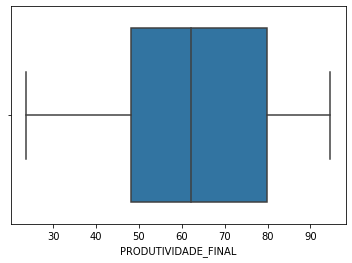

In [ ]:
sns.boxplot(x=alegrete_df["PRODUTIVIDADE_FINAL"])

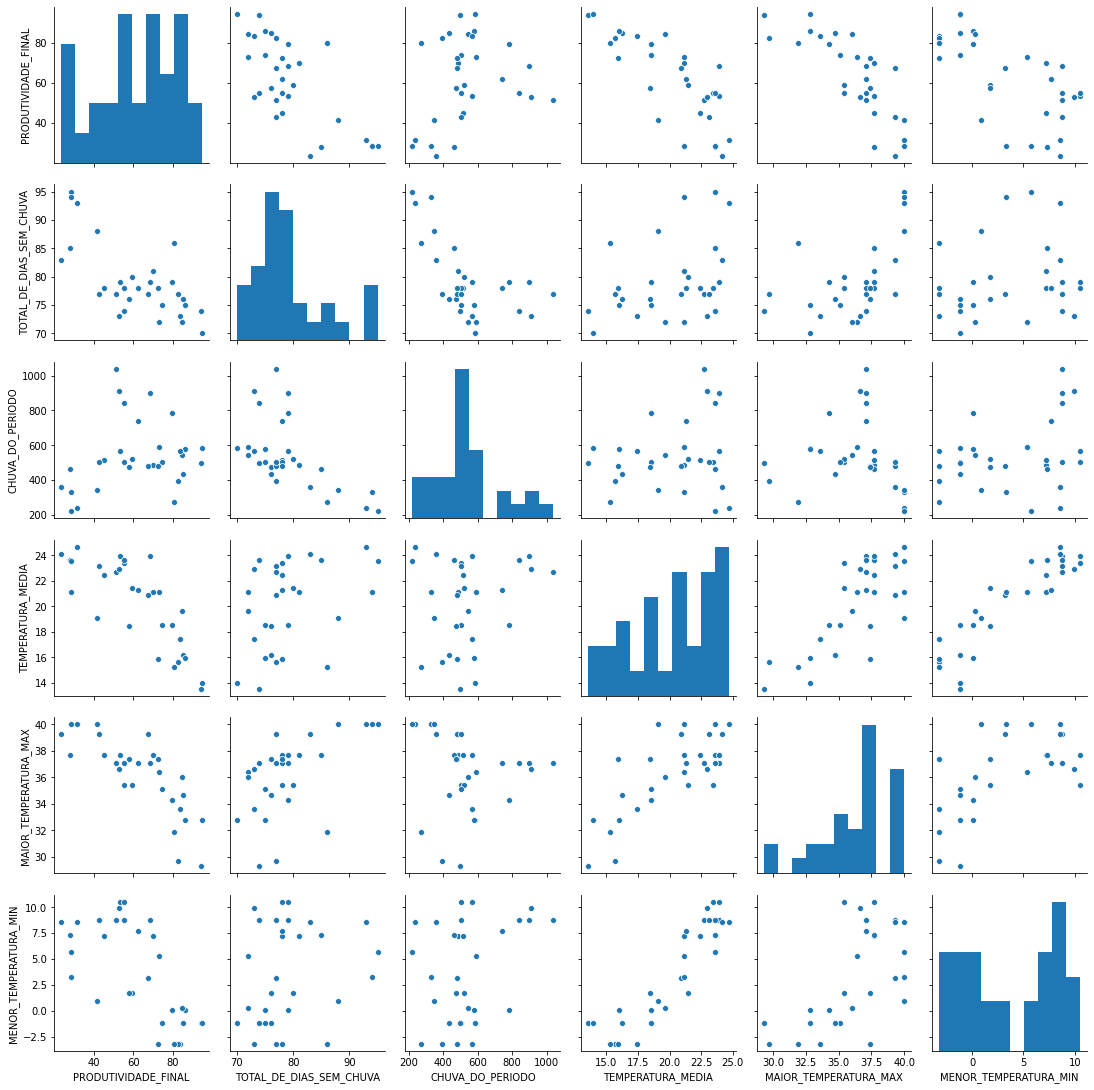

In [ ]:
sns.pairplot(alegrete_df[['PRODUTIVIDADE_FINAL', 'TOTAL_DE_DIAS_SEM_CHUVA', 'CHUVA_DO_PERIODO', 'TEMPERATURA_MEDIA', 'MAIOR_TEMPERATURA_MAX', 'MENOR_TEMPERATURA_MIN']])

#Regressão Linear:
* Aqui podemos ver todas as relações em que o nÍvel de produção tem em relação as outras variáveis.
---



0


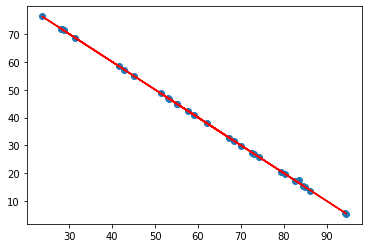

coefficient of determination: 0.9999248211905215
intercept: [99.93205005]
slope: [[-0.99851701]]


1


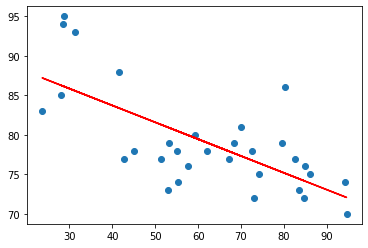

coefficient of determination: 0.4787511057901703
intercept: [92.23617845]
slope: [[-0.21296076]]


2


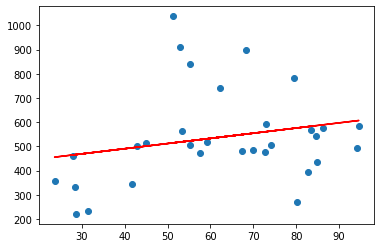

coefficient of determination: 0.05135815850478642
intercept: [405.14400479]
slope: [[2.13293834]]


3


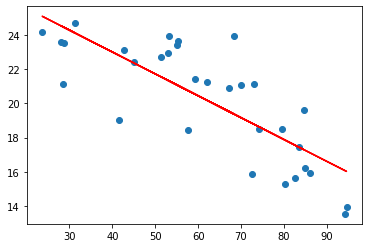

coefficient of determination: 0.6232647287349642
intercept: [28.11149419]
slope: [[-0.12773641]]


4


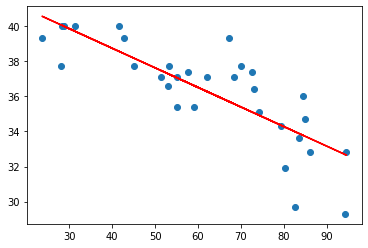

coefficient of determination: 0.6522429404910299
intercept: [43.19393634]
slope: [[-0.1114218]]


5


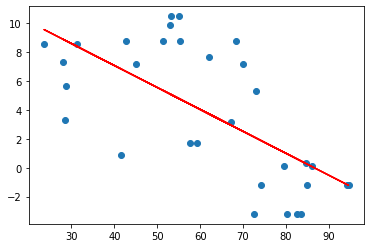

coefficient of determination: 0.44072397705261196
intercept: [13.16323595]
slope: [[-0.15196654]]


6


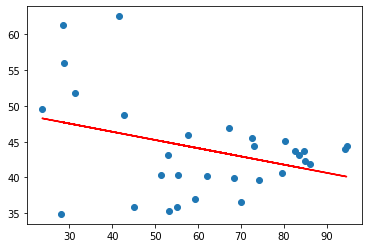

coefficient of determination: 0.12208907994218565
intercept: [50.98465017]
slope: [[-0.11485792]]


7


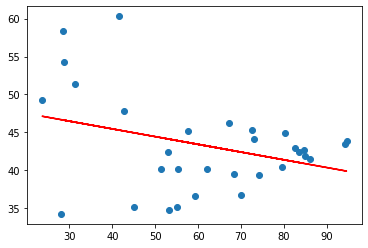

coefficient of determination: 0.10986298716725562
intercept: [49.53276757]
slope: [[-0.10183503]]


In [ ]:
#Para cada variável estamos relacionando com o nível de produtividade
for i in range(8):
  print("")
  print("")
  print(i)
  x = alegrete_df.iloc[:,1]
  y = alegrete_df.iloc[:,i+2]

  x = x[:, np.newaxis]
  y = y[:, np.newaxis]

  model = LinearRegression()
  model.fit(x, y)
  y_pred = model.predict(x)
  r_sq = model.score(x, y)

  plt.scatter(x, y)
  plt.plot(x, y_pred, color='r')
  plt.show()
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('slope:', model.coef_)


#Regreção Linear Multipla 
* Sabendo que a maioria das variáveis tem alguma relação com o nível de produtividade, então resolvemos implementar a RLM para demonstrar que a maioria das variáveis estão relacionadas com o nível de produtividade.
---

In [ ]:
alvo = alegrete_df["PRODUTIVIDADE_FINAL"]
inputs = alegrete_df.drop(["PRODUTIVIDADE_FINAL", "PERDA_FINAL", "DATA", "Nacional"] , axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
inputs_scaled = scaler.transform(inputs)
scaled_inputs = preprocessing.scale(inputs)

In [ ]:
reg = LinearRegression()
reg.fit(scaled_inputs, alvo) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat = reg.predict(inputs)

Text(0.5, 1.0, 'Redidual')

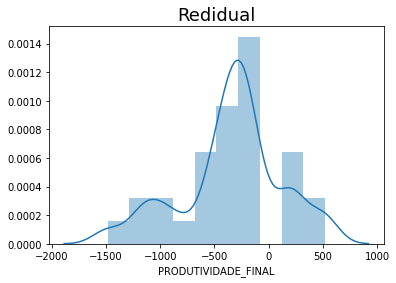

In [ ]:
sns.distplot(alvo - y_hat)
plt.title("Redidual", size=18)

In [ ]:
reg.intercept_

61.698709677419394

In [ ]:
reg.coef_

array([-5.77980291,  2.30028964, -8.5843026 , -3.51934262, -3.82252245,
       -2.64719282])

In [ ]:
reg.predict(scaled_inputs)
predito = reg.predict(scaled_inputs)
reg.predict(scaled_inputs)

array([55.42232957, 55.37481712, 45.58366368, 48.69814925, 52.90389845,
       63.08431525, 76.75074042, 80.44681215, 95.93968217, 95.12636706,
       85.1262733 , 75.97686701, 59.74669789, 59.44134966, 53.04141297,
       57.55920802, 59.64302192, 64.97408634, 73.12322799, 84.23727661,
       87.81145778, 75.76910984, 76.95995769, 67.99852823, 56.8329201 ,
       46.00376367, 36.01996058, 22.25802592, 23.87587388, 32.18173559,
       44.7484699 ])

#Verificacao do modelo

## R ao quadrado

Quanto mais proximo de 1 for o R ao quadrado, melhor representa o modelo matematico com o observado.

In [ ]:
reg.score(scaled_inputs ,alvo)

0.85845043067415

Nosso R ao quadrado chegou a 0.875, sendo um valor bom.

## Erro Quadrático Médio

O M.S.E. é a média do quadrado do desvio entre os valores preditos e os observados, opta-se para escolha de um valor baixo para SME.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(alvo, predito)

59.51443491053372

##Erro Percentual Absoluto médio

O MAPE é a média de todos os erros absolut percetuais e indica a média do erro absoluto em termos percentuais, independete se este erro for negativo ou posivivo, assim quanto menor for o MAPE mais acurado é o modelo

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(alvo, predito)

13.066902341765955

Analisando o MAPE da regressâo temos um valor ótimo, sendo que aglumas literaturas identificam como bom <= a 50

In [ ]:
def desvio_medio_absoluto(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(np.abs((y_pred - y_true))) * len(y_true)

desvio_medio_absoluto(alvo, predito)

6001.247550714283

##BIAS

Bias é o erro sistemático associado à análise. Ele mede a tendência de o modelo suprestimar ou substmar o valor predito em relação ao valor observado.

In [ ]:
def bias(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(((y_pred - y_true))) * len(y_true)

bias(alvo, predito)

1.057287590811029e-11

O valor do BIAS da regressão deu zero sendo um excelente

#Regressão Polinomial
* Mas como o foco é o preço médio da saca de arrroz vs o nível de produtividade, logo, vamos realizar uma regreção polinimial para identificar com mais clareza a relação não lienar que essa variáveis detem, visto em gráficos anteriores.
---


In [ ]:
#Importando os dados para as variáveis
X = np.array(alegrete_df.iloc[:,1]).reshape((-1, 1))
Y = np.array(alegrete_df.iloc[:,3:9])

#Caso queira normalizar os dados antes de colocalos no modelo
#X_scaled = preprocessing.scale(x)
#Y_scaled = preprocessing.scale(y)

#Trnasformando os dados de entrada
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X) ##include_bias=True

#Criando modelo e o fit
model = LinearRegression().fit(x_, Y)

#Respostas do Modelo de RPM
r_sq = model.score(x_, Y)
intercept2, coefficients2 = model.intercept_, model.coef_

print('coefficient of determination:', r_sq)
print("")
print('intercept:', model.intercept_)
print("")
print('coefficients:', model.coef_)

coefficient of determination: 0.2675064342127614

intercept: [ 103.85749768 -269.49229674   20.04459424   38.48777245    2.06384676
   69.86812905]

coefficients: [[-6.61866857e-01  3.80291514e-03]
 [ 2.81926603e+01 -2.20765350e-01]
 [ 1.83870258e-01 -2.63978085e-03]
 [ 7.03669945e-02 -1.54002670e-03]
 [ 2.76778545e-01 -3.63212079e-03]
 [-8.44285330e-01  6.17935591e-03]]


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
X = np.array(alegrete_df.iloc[:,1])
Y = np.array(alegrete_df.iloc[:,3:9])
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')


predicted response:
[[ 7.61611019e+01  6.22243708e+02  1.99805862e+01  3.58673312e+01
   3.64095305e+00  4.10469999e+01]
 [ 8.17648076e+01  5.52377096e+02  2.29715860e+01  3.85336847e+01
   7.16233005e+00  4.43798462e+01]
 [ 8.82887611e+01  3.47454995e+02  2.31248108e+01  3.92500299e+01
   6.96899270e+00  5.10528351e+01]
 [ 7.93887888e+01  6.05913151e+02  2.23475015e+01  3.78651622e+01
   6.49989424e+00  4.24263051e+01]
 [ 7.89173459e+01  6.13946895e+02  2.21539391e+01  3.76824958e+01
   6.27852808e+00  4.20971915e+01]
 [ 7.80049446e+01  6.25789553e+02  2.16795185e+01  3.72573789e+01
   5.72139311e+00  4.15439825e+01]
 [ 7.56834838e+01  6.06902843e+02  1.91520054e+01  3.52285890e+01
   2.60104266e+00  4.12441945e+01]
 [ 7.50762909e+01  5.32692756e+02  1.66249685e+01  3.33594910e+01
  -6.21417648e-01  4.27312140e+01]
 [ 7.52547940e+01  4.27398035e+02  1.39438420e+01  3.14528984e+01
  -4.08967184e+00  4.51666323e+01]
 [ 7.52795218e+01  4.21461444e+02  1.38054298e+01  3.13559132e+01
  -4.

In [ ]:
mean_squared_error(Y, y_pred)

4562.299204821278

In [ ]:
mean_absolute_percentage_error(Y, y_pred)

38.69393205130464

In [ ]:
desvio_medio_absoluto(Y, y_pred)

140863.3467635758

In [ ]:
bias(Y, y_pred)

-5.392166713136248e-10

#Resultados

###Aqui apresentaremos as diferenças entre os dois modelos

## Comparativo

Segue uma analise comparativa entre os dois modelos matematicos 

In [ ]:
print("    ", "RPM"," ", "RLM")
print("R^2  ", str(r_sq)[:4], str(reg.score(scaled_inputs ,alvo))[:4])
print("MSE  ", str(mean_squared_error(Y, y_pred))[:4], str(mean_squared_error(alvo, predito))[:4])
print("MAPE ", str(mean_absolute_percentage_error(Y, y_pred))[:4], str(desvio_medio_absoluto(alvo, predito))[:4])
print("MAD ", str(desvio_medio_absoluto(Y, y_pred))[:4], str(desvio_medio_absoluto(alvo, predito))[:4])
print("Bias", str(bias(Y, y_pred))[:4], str(bias(alvo, predito))[:4])

     RPM   RLM
R^2   0.26 0.85
MSE   4562 59.5
MAPE  38.6 6001
MAD  1408 6001
Bias -5.3 1.05


Assim a modelagem matematica de melhor acuracidade é a REGRESSÃO LINEAR MULTIPLA, pois contempla um R² maior.


#Programa


Aqui iremos fazer um exemplo dos dados de entrada para o sistema:

In [ ]:
data_cutivo = 11/01/2020
tipo_cutivo = "arroz ciclo 120d"
previsao_preco_saca = 43
ha = 12
data_teste = { 'TOTAL_DE_DIAS_SEM_CHUVA' :[78],
        'CHUVA_DO_PERIODO': [477],
        'TEMPERATURA_MEDIA': [15],
        'MAIOR_TEMPERATURA_MAX':  [22],
        'MENOR_TEMPERATURA_MIN':  [10],
        "Nacional": [previsao_preco_saca]
        }
teste = pd.DataFrame (data_teste, columns =['TOTAL_DE_DIAS_SEM_CHUVA', 'CHUVA_DO_PERIODO', 'TEMPERATURA_MEDIA','MAIOR_TEMPERATURA_MAX', 'MENOR_TEMPERATURA_MIN',  "Nacional" ])
teste.head()
scaled_teste = preprocessing.scale(teste)


text_sucesso = ("Previsão de sucesso da produção em: %s ") % (str(reg.predict(scaled_teste)[0])[:5])
previsao = reg.predict(scaled_teste)[0]
min_kg = 120
max_kg = 150
text_valor_gerado = ("Valor da produção de R$: %s a R$:%s") % ((ha*min_kg*previsao), (ha*max_kg*previsao))
print(text_sucesso)
print(text_valor_gerado)

Previsão de sucesso da produção em: 61.69 
Valor da produção de R$: 88846.14193548393 a R$:111057.6774193549


 #### (120 a 150kg por ha) 